In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
sb.set_style("whitegrid")

In [2]:

data = '../data/NCDOT_BikePedCrash.csv'

In [3]:
BikeCrash = pd.read_csv(data)

In [34]:
Features = ['BikeAge', 'BikeAgeGrp', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace', 'BikeSex', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth', 'DrvrVehTyp', 'LightCond', 'Locality', 'NumLanes', 'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdFeature', 'RdSurface', 'Region', 'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone']
BikeCrashTrunc = BikeCrash[Features].copy()
BikeCrashTrunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11266 entries, 0 to 11265
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BikeAge     11266 non-null  object
 1   BikeAgeGrp  11266 non-null  object
 2   BikeDir     11266 non-null  object
 3   BikeInjury  11266 non-null  object
 4   BikePos     11266 non-null  object
 5   BikeRace    11266 non-null  object
 6   BikeSex     11266 non-null  object
 7   CrashDay    11266 non-null  object
 8   CrashGrp    11266 non-null  object
 9   CrashHour   11266 non-null  int64 
 10  CrashLoc    11266 non-null  object
 11  CrashMonth  11266 non-null  object
 12  DrvrVehTyp  11266 non-null  object
 13  LightCond   11266 non-null  object
 14  Locality    11266 non-null  object
 15  NumLanes    11266 non-null  object
 16  RdCharacte  11266 non-null  object
 17  RdClass     11266 non-null  object
 18  RdConditio  11266 non-null  object
 19  RdConfig    11266 non-null  object
 20  RdFeat

In [35]:
BikeCrashTrunc = BikeCrashTrunc[BikeCrashTrunc.BikeInjury != 'Unknown Injury']
BikeCrashTrunc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10927 entries, 0 to 11264
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BikeAge     10927 non-null  object
 1   BikeAgeGrp  10927 non-null  object
 2   BikeDir     10927 non-null  object
 3   BikeInjury  10927 non-null  object
 4   BikePos     10927 non-null  object
 5   BikeRace    10927 non-null  object
 6   BikeSex     10927 non-null  object
 7   CrashDay    10927 non-null  object
 8   CrashGrp    10927 non-null  object
 9   CrashHour   10927 non-null  int64 
 10  CrashLoc    10927 non-null  object
 11  CrashMonth  10927 non-null  object
 12  DrvrVehTyp  10927 non-null  object
 13  LightCond   10927 non-null  object
 14  Locality    10927 non-null  object
 15  NumLanes    10927 non-null  object
 16  RdCharacte  10927 non-null  object
 17  RdClass     10927 non-null  object
 18  RdConditio  10927 non-null  object
 19  RdConfig    10927 non-null  object
 20  RdFeature  

In [36]:
InjuryCategories = ['O: No Injury', 'C: Possible Injury', 'B: Suspected Minor Injury', 'A: Suspected Serious Injury', 'K: Killed']

BikeCrashTrunc['BikeInjury'] = pd.Categorical(BikeCrashTrunc['BikeInjury'], categories=InjuryCategories, ordered=True)

BikeCrashTrunc = BikeCrashTrunc.sort_values(by='BikeInjury')

In [37]:
cat_columns = BikeCrashTrunc.select_dtypes(['category']).columns
BikeCrashTrunc[cat_columns] = BikeCrashTrunc[cat_columns].apply(lambda x: x.cat.codes)

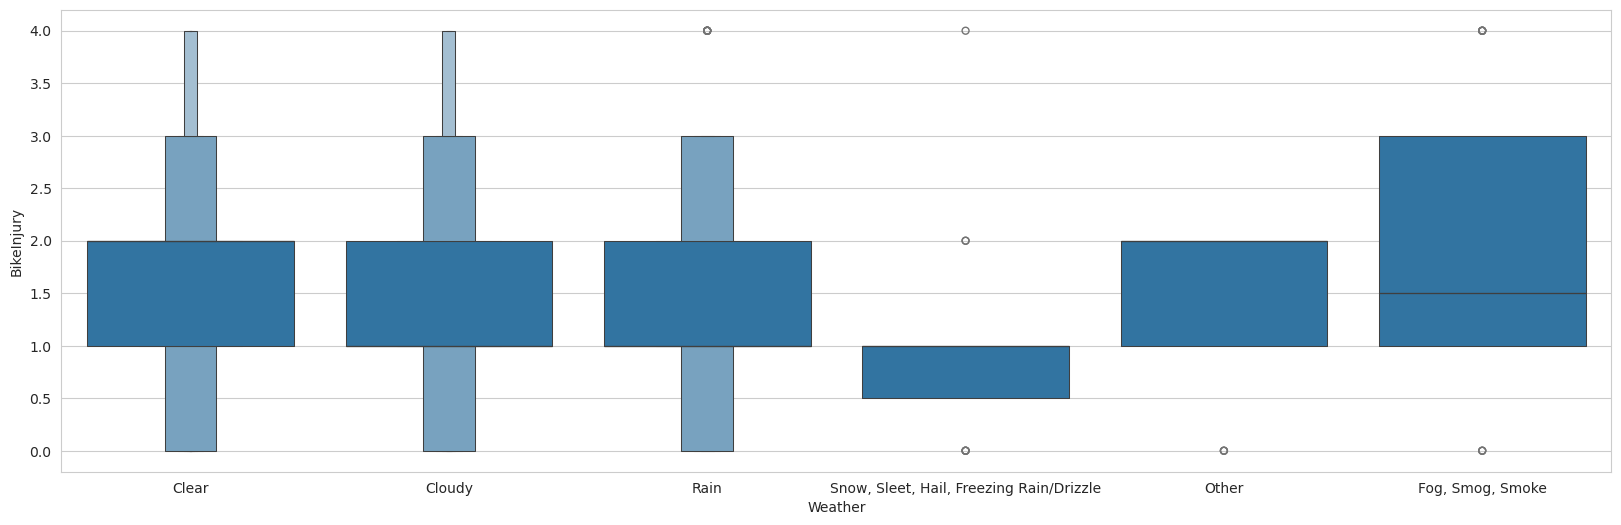

In [ ]:
plt.figure(figsize=(20, 6))
sb.boxenplot(data = BikeCrashTrunc, x = 'Weather', y = 'BikeInjury')
plt.show()

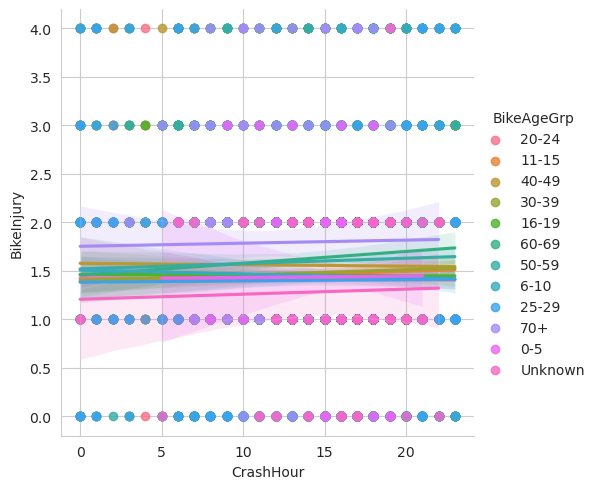

In [ ]:
sb.lmplot(data=BikeCrashTrunc, x = 'CrashHour', y = 'BikeInjury', hue='BikeAgeGrp')

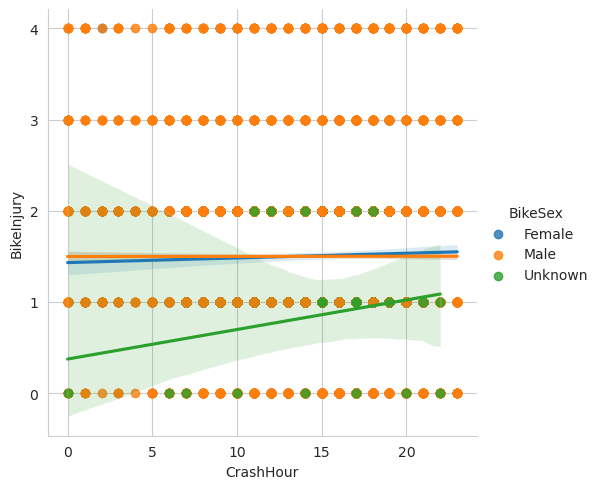

In [ ]:
sb.lmplot(data=BikeCrashTrunc, x = 'CrashHour', y = 'BikeInjury', hue='BikeSex')

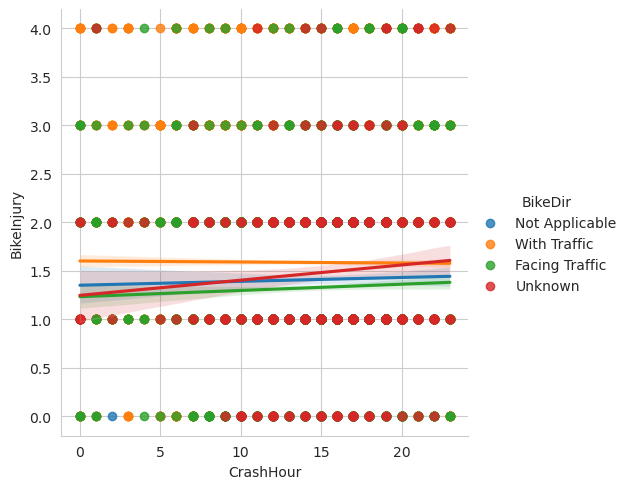

In [ ]:
sb.lmplot(data=BikeCrashTrunc, x = 'CrashHour', y = 'BikeInjury', hue='BikeDir')

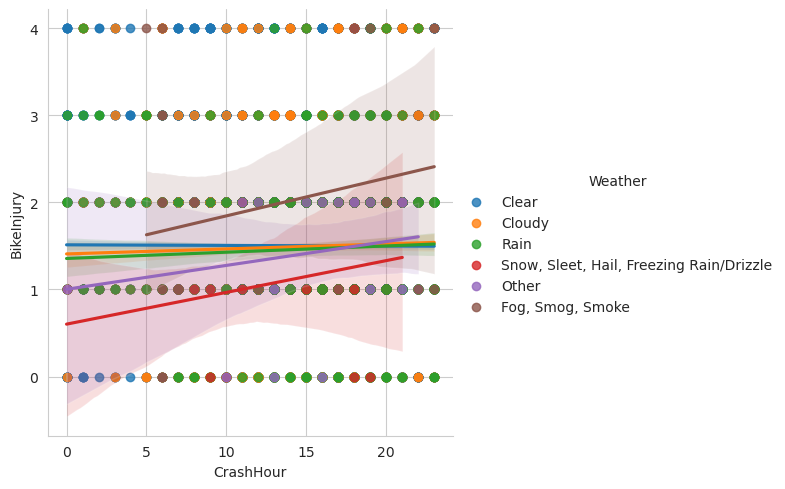

In [ ]:
sb.lmplot(data=BikeCrashTrunc, x = 'CrashHour', y = 'BikeInjury', hue='Weather')

In [20]:
# One hot encode weather, clear vs everything else
# What will be easiest (I am guessing), is to one hot encode all weathers, and then combine all non "clear" weathers into one column after

WeatherEncoded = pd.get_dummies(BikeCrashTrunc, columns = ['Weather'], dtype=float)

WeatherEncoded.head()

,BikeAge,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashDay,CrashGrp,CrashHour,...,Region,SpeedLimit,TraffCntrl,Workzone,Weather_Clear,Weather_Cloudy,"Weather_Fog, Smog, Smoke",Weather_Other,Weather_Rain,"Weather_Snow, Sleet, Hail, Freezing Rain/Drizzle"
11264,21,20-24,Not Applicable,0,Unknown,White,Female,Thursday,Bicyclist Failed to Yield—Midblock,17,...,Coastal,20 - 25 MPH,No Control Present,No,1.0,0.0,0.0,0.0,0.0,0.0
10230,14,11-15,With Traffic,0,Unknown,White,Male,Sunday,Bicyclist Failed to Yield - Signalized Interse...,14,...,Piedmont,Unknown,Stop And Go Signal,No,1.0,0.0,0.0,0.0,0.0,0.0
8564,47,40-49,With Traffic,0,Travel Lane,White,Male,Thursday,Motorist Left Turn / Merge,7,...,Piedmont,30 - 35 MPH,No Control Present,No,1.0,0.0,0.0,0.0,0.0,0.0
8563,13,11-15,Not Applicable,0,Travel Lane,Asian,Male,Thursday,Bicyclist Failed to Yield - Midblock,17,...,Piedmont,40 - 45 MPH,Stop And Go Signal,No,1.0,0.0,0.0,0.0,0.0,0.0
4516,38,30-39,With Traffic,0,Travel Lane,White,Female,Saturday,Motorist Overtaking Bicyclist,5,...,Piedmont,30 - 35 MPH,No Control Present,No,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# What will be easiest (I am guessing), is to one hot encode all weathers, and then combine all non "clear" weathers into one column after

WeatherEncoded = pd.get_dummies(BikeCrashTrunc, columns = ['Weather'], dtype=float)

WeatherEncoded.head()

In [27]:
WeatherEncoded['Weather_NotClear'] = WeatherEncoded.apply(lambda row: row['Weather_Cloudy'] + row['Weather_Rain'] + row['Weather_Fog, Smog, Smoke'] + row['Weather_Rain'] + row['Weather_Other'] + row['Weather_Snow, Sleet, Hail, Freezing Rain/Drizzle'], axis=1)

WeatherEncoded.head()

,BikeAge,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashDay,CrashGrp,CrashHour,...,SpeedLimit,TraffCntrl,Workzone,Weather_Clear,Weather_Cloudy,"Weather_Fog, Smog, Smoke",Weather_Other,Weather_Rain,"Weather_Snow, Sleet, Hail, Freezing Rain/Drizzle",Weather_NotClear
11264,21,20-24,Not Applicable,0,Unknown,White,Female,Thursday,Bicyclist Failed to Yield—Midblock,17,...,20 - 25 MPH,No Control Present,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10230,14,11-15,With Traffic,0,Unknown,White,Male,Sunday,Bicyclist Failed to Yield - Signalized Interse...,14,...,Unknown,Stop And Go Signal,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8564,47,40-49,With Traffic,0,Travel Lane,White,Male,Thursday,Motorist Left Turn / Merge,7,...,30 - 35 MPH,No Control Present,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8563,13,11-15,Not Applicable,0,Travel Lane,Asian,Male,Thursday,Bicyclist Failed to Yield - Midblock,17,...,40 - 45 MPH,Stop And Go Signal,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4516,38,30-39,With Traffic,0,Travel Lane,White,Female,Saturday,Motorist Overtaking Bicyclist,5,...,30 - 35 MPH,No Control Present,No,0.0,1.0,0.0,0.0,0.0,0.0,1.0


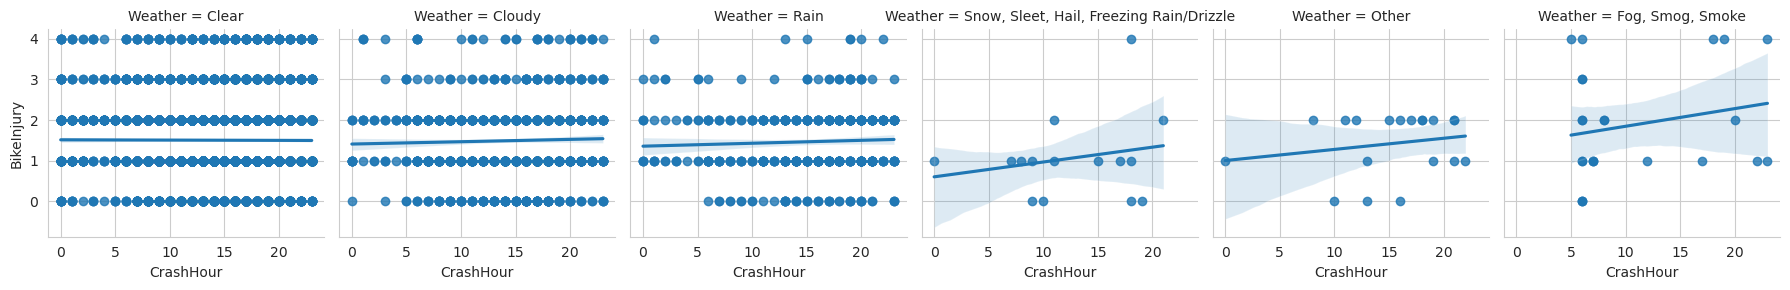

In [52]:
# Okay, we are set up to look at trends in all weather, and trends in clear vs all other weathers. First, I just want to wake a quick look at all weathers individually.
# Then, I will look at all weathers vs. clear

sb.lmplot(
    data=BikeCrashTrunc, x='CrashHour', y='BikeInjury',
    col='Weather', height=3,)

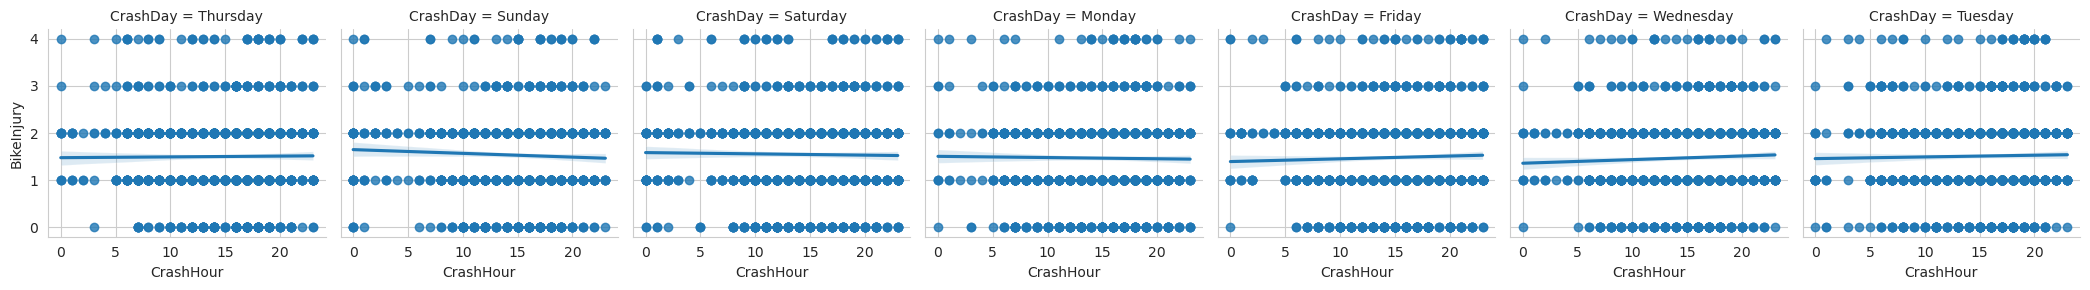

In [54]:
sb.lmplot(
    data=BikeCrashTrunc, x='CrashHour', y='BikeInjury',
    col='CrashDay', height=3,)

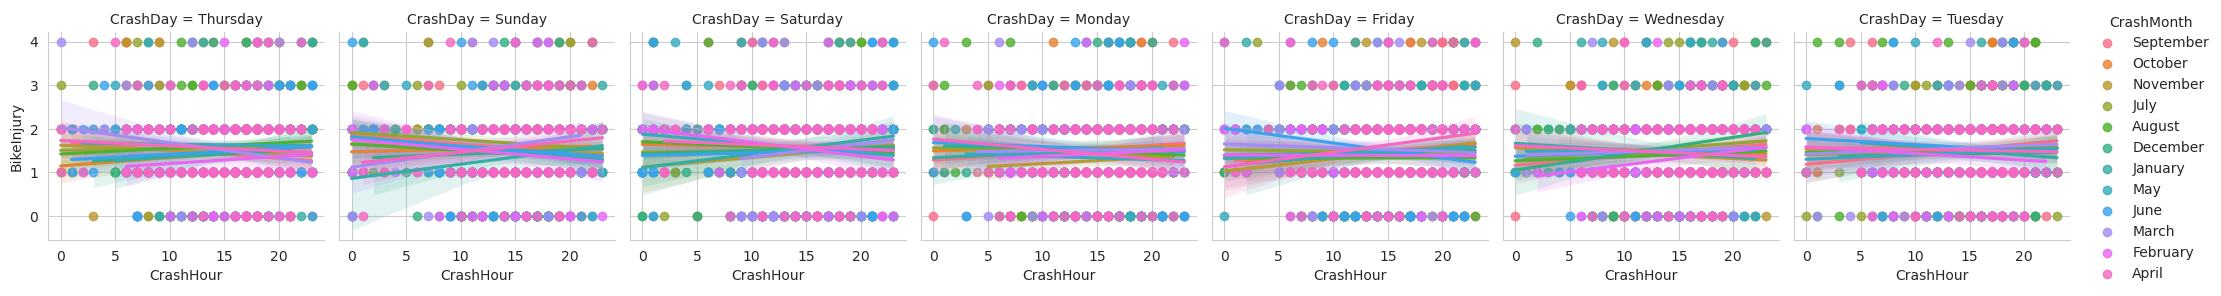

In [56]:
sb.lmplot(
    data=BikeCrashTrunc, x='CrashHour', y='BikeInjury', hue='CrashMonth',
    col='CrashDay', height=3,)

In [59]:
WeekDays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

BikeCrashTrunc['CrashDay'] = pd.Categorical(BikeCrashTrunc['CrashDay'], categories=WeekDays, ordered=True)

BikeCrashTrunc = BikeCrashTrunc.sort_values(by='CrashDay')

cat_columns = BikeCrashTrunc.select_dtypes(['category']).columns

BikeCrashTrunc[cat_columns] = BikeCrashTrunc[cat_columns].apply(lambda x: x.cat.codes)

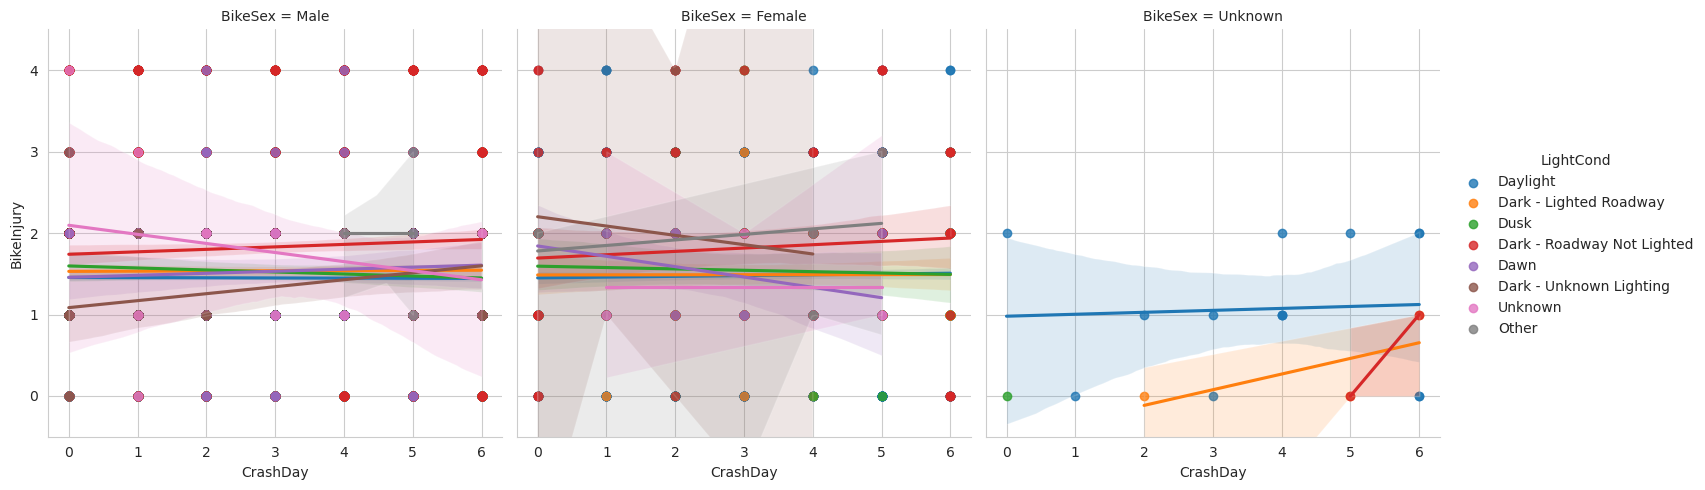

In [76]:
plot1 = sb.lmplot(
    data=BikeCrashTrunc, x='CrashDay', y='BikeInjury', hue='LightCond', col='BikeSex', height=5)

plot1.set(ylim=(-0.5, 4.5))

In [72]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

BikeCrashTrunc['CrashMonth'] = pd.Categorical(BikeCrashTrunc['CrashMonth'], categories=Months, ordered=True)

BikeCrashTrunc = BikeCrashTrunc.sort_values(by='CrashMonth')

cat_columns = BikeCrashTrunc.select_dtypes(['category']).columns

BikeCrashTrunc[cat_columns] = BikeCrashTrunc[cat_columns].apply(lambda x: x.cat.codes)

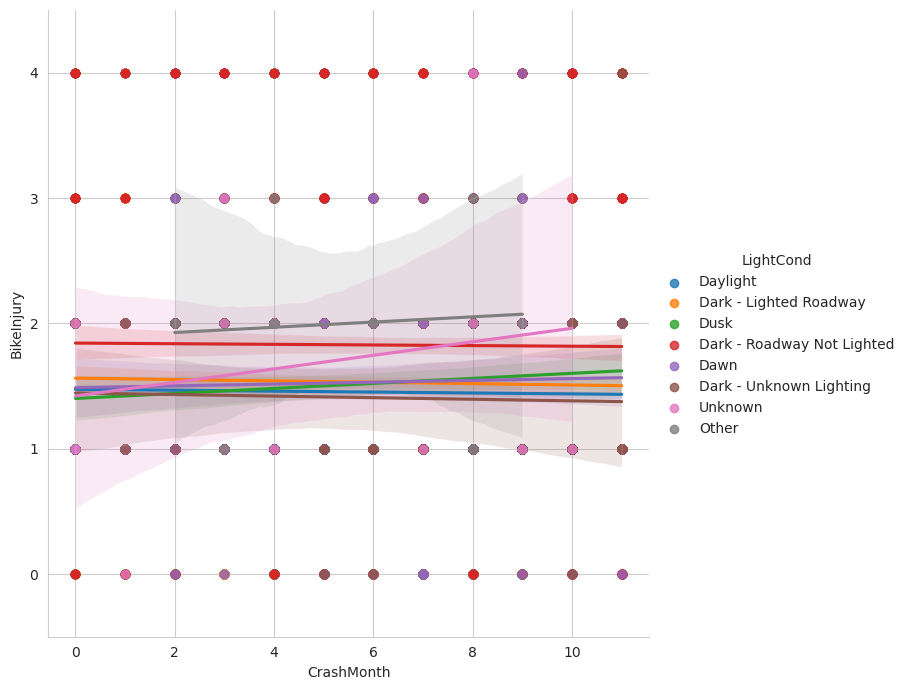

In [75]:
plot2 = sb.lmplot(
    data=BikeCrashTrunc, x='CrashMonth', y='BikeInjury', hue='LightCond', height=7)

plot2.set(ylim=(-0.5, 4.5))

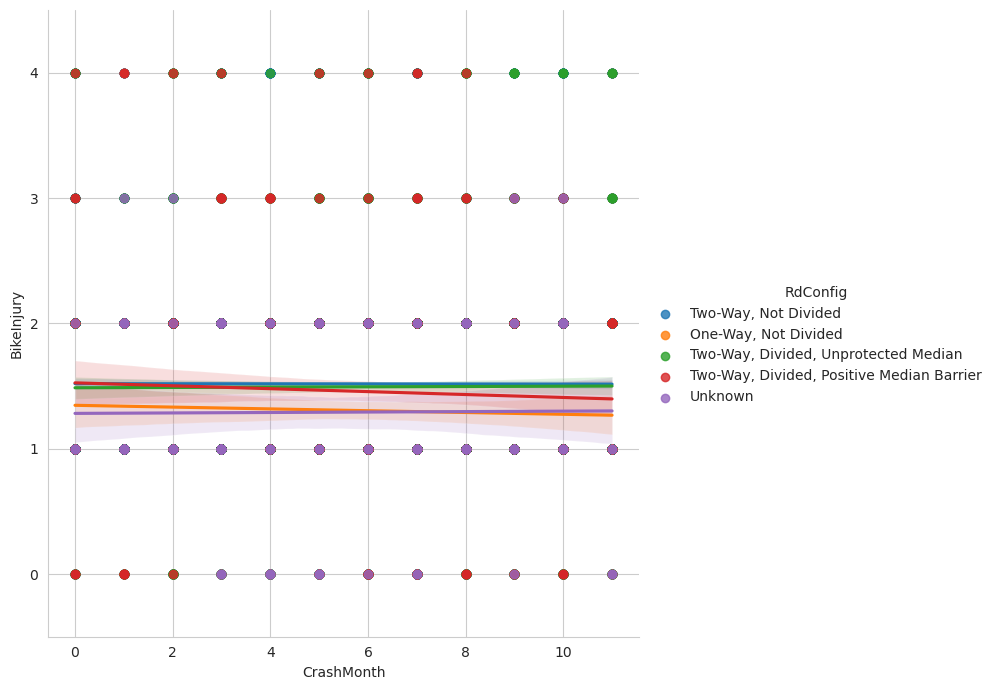

In [78]:
plot2 = sb.lmplot(
    data=BikeCrashTrunc, x='CrashMonth', y='BikeInjury', hue='RdConfig', height=7)

plot2.set(ylim=(-0.5, 4.5))

In [ ]:
# I don't see any sort of correlations. There are too many variable to just do this one at a time.